# MSA 2023 Phase 2 - Part 2

In [6]:
#importing libraries
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Load and split preprocessed data

In [7]:
#loading and checking data
MarketData = pd.read_csv('PreprocessedMarketData.csv')
MarketData = MarketData.drop('Unnamed: 0', axis=1)
MarketData.head()

,Is_Male,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Profession_Artist,Profession_Doctor,...,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,0.247191,0,0.071429,1,0.444444,D,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0.752809,1,0.071429,1,0.111111,B,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,1,0.752809,1,0.000000,3,0.222222,B,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1,1,0.629213,0,0.000000,2,0.222222,C,1,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0.359551,1,0.071429,1,0.333333,C,0,0,...,0,0,0,0,0,0,0,0,1,0


The data consists of the following   
boolean values (1 for yes, 0 for no) for: Is_Male, Ever_Married, Graduated, all of the professions, and the values of 'Var_1'.
The last two are from one-hot vectors meaning for each type only one value is true, all of these names are self describing, apart from Var_1 which I do not understand    
As well as this there are numerical values which have been normalised for: Age, Work_Experience and Family_Size    
The market segments are a categorical value from A through D    
The spending score is ordinal data, with 1 being low, 2 being average, and 3 being high


In [8]:
from sklearn.model_selection import train_test_split

#seperating data to target and other data, then splitting both those to training and test data
y = MarketData['Segmentation']
X = MarketData.drop('Segmentation', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)



## 2. Choose an algorithm

I have decided to use random forest for this classification model as it should have enough complexity to do well in the dataset while still being one covered in the MSlearn course and reasonable to train.    

The model works by creating a large amount of decision trees and then running them all on a given input, and taking the most common output of the trees to create its' output. A singular decision tree is a simple model trained by partitioning the dataset through simple questions (such as "is age > 0.5", meaning in this case is their age above average) to best devide the dataset by the output column. This however is prone to overfitting, so by using many trees we attempt to cancel out the overfitting by overfitting in different directions

## 3. Train and test a model

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split

#creating and fitting a model
model = RandomForestClassifier()
model = model.fit(X_train, y_train)

In [10]:
#using the model to create a prediction for test data
y_pred = model.predict(X_test)

## 4. Evaluate the model 

In [11]:
from sklearn.metrics import confusion_matrix
#creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[216  90  63 104]
 [122 126 160  64]
 [ 67 121 277  55]
 [112  49  36 338]]


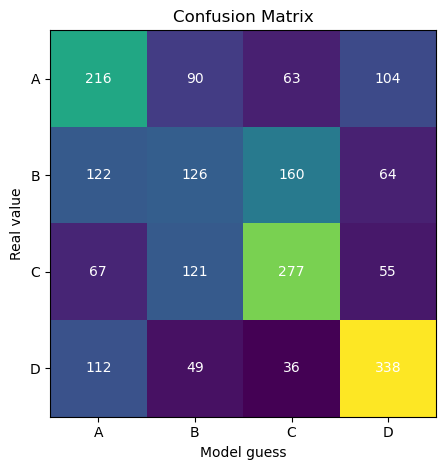

In [12]:
#plotting confusion matrix as heatmap
Segment = ['A','B','C','D']

fig, ax = plt.subplots()
im = ax.imshow(cm)
ax.set_xticks(np.arange(len(Segment)), labels=Segment)
ax.set_yticks(np.arange(len(Segment)), labels=Segment)


# Loop over data dimensions and create text annotations.
for i in range(len(Segment)):
    for j in range(len(Segment)):
        text = ax.text(j, i, cm[i][j],ha="center", va="center", color="w")

ax.set_title("Confusion Matrix")
ax.set_xlabel("Model guess")
ax.set_ylabel("Real value")
fig.tight_layout()
plt.show()

From a cursory glance we can see the model does best for D and closely behind on A and C, but struggles with B. We can also see the model generally does pretty well at telling A and D from B and C from the square in the middle and the corners

In [15]:
from sklearn.metrics import classification_report
#creating classification report and displaying 
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           A       0.42      0.46      0.44       473
           B       0.33      0.27      0.29       472
           C       0.52      0.53      0.52       520
           D       0.60      0.63      0.62       535

    accuracy                           0.48      2000
   macro avg       0.47      0.47      0.47      2000
weighted avg       0.47      0.48      0.47      2000



Here we get confirmation of this, D has an f1-score of around 60%, C and A are around 50% and 40% respectively with B at around 30%.   

Precision is the fraction of values the model said where a certain value that were correctly that value. (Eg out of all values the model said was D, what fraction were D)
Recall is the fraction of values that were a certain value that the model correctly identified (Eg out of all values that were D, what fraction did the model identify correctly)    
f1-score is 2 times the product of precision and recall divided by the sum of precision and recall (or the harmonic mean of precision and recall), where a higher value is better.    
this model is a random forest so ROC and AUC cannot be calculated 

In [14]:
import joblib
#saving model to use in part 3
filename = './MarketClassifier.pkl'
joblib.dump(model, filename)

['./MarketClassifier.pkl']

## 5. Summary

The data was loaded, then split into test and training data with prediction target the market segment. The model chosen was random forest, which was trained off the training data, then the model was used to make predictions for the test data. These predictions were then plotted in a correlation matrix to visualise the results. After this a classification report was produced to get numerical values on the model's performance in the test set